In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
data=pd.read_csv('C:/Users/120761/Documents/PyScripts/new/ova1.csv',parse_dates=['Date'],index_col=['Date'])

In [21]:
data.head()

,Orders
Date,
2018-01-01,10
2018-01-02,11
2018-01-03,6
2018-01-04,3
2018-01-05,7


In [22]:
type(data)

pandas.core.frame.DataFrame

In [23]:
ts=data['Orders'].resample('MS').sum()

<AxesSubplot:xlabel='Date'>

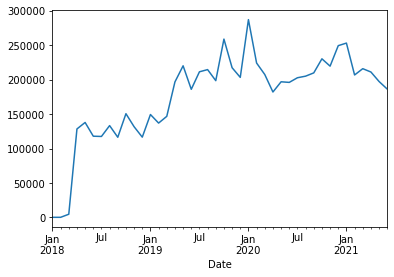

In [24]:
ts.plot()

In [25]:
import statsmodels.api as sm

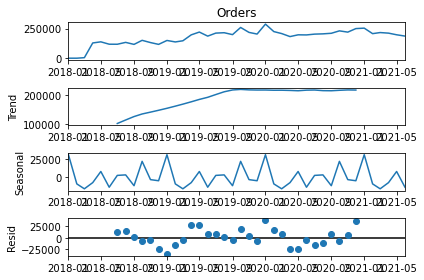

In [26]:
decomposition=sm.tsa.seasonal_decompose(ts,model='additive')
fig=decomposition.plot()
plt.show()

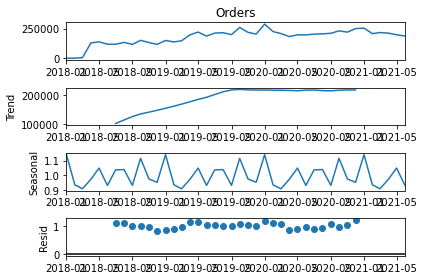

In [27]:
decomposition=sm.tsa.seasonal_decompose(ts,model='multiplicative')
fig=decomposition.plot()
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
adftest=adfuller(ts)

In [30]:
print('p-values',adftest[1])    #p-value is 0.2 which is less than 0.5(5%). SO the series is stationary

p-values 0.21449999667578357


# Train & Test Data

In [31]:
train=ts[:30]
test=ts[30:]

# ARIMA MODEL BUILDING

In [32]:
import warnings 
warnings.filterwarnings('ignore')

In [33]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

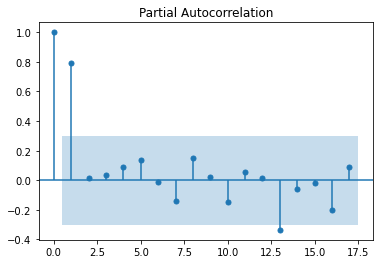

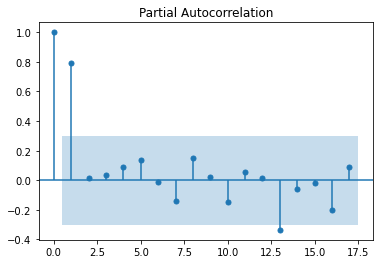

In [34]:
plot_pacf(ts)

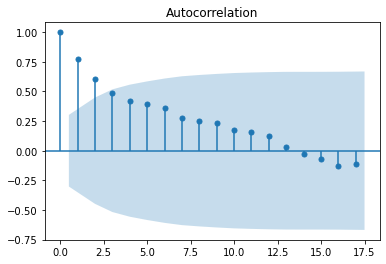

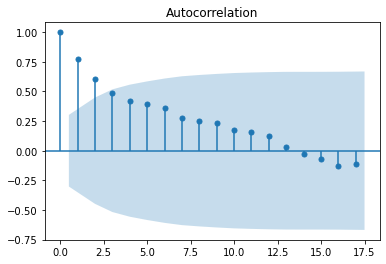

In [35]:
plot_acf(ts)

# p=2,q=3,d=0

#Building ARIMA Model

# p=4,0,1  which is the lowest rmse value ....

In [36]:
from statsmodels.tsa.arima_model import ARIMA


In [37]:
model=ARIMA(train,order=(4,0,1)).fit()

In [38]:
model

In [39]:
len(train),(len(ts)-1)

(30, 41)

In [40]:
predict=model.predict(start=len(train),end=(len(ts)-1))

In [41]:
predict

2020-07-01    187958.658328
2020-08-01    195220.694047
2020-09-01    194130.065994
2020-10-01    192174.522932
2020-11-01    195325.385449
2020-12-01    194731.663211
2021-01-01    194553.374837
2021-02-01    195952.410144
2021-03-01    195811.501443
2021-04-01    196091.146693
2021-05-01    196796.354701
2021-06-01    196906.367818
Freq: MS, dtype: float64

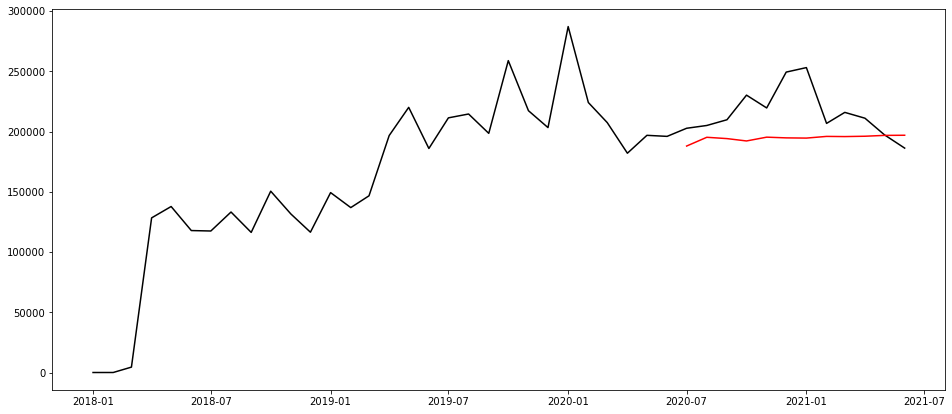

In [42]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
origin=plt.plot(ts,color='black',label='Original')
mean=plt.plot(predict,color='red',label='rollingmean')
plt.show()

# MODEL EVALUATION (Whether my approach is correct or not )

In [150]:
from sklearn.metrics import mean_squared_error

In [153]:
error=np.sqrt(mean_squared_error(test,predict))
error

28623.37530358626

In [154]:
test.mean(),np.sqrt(test.var())

(215544.58333333334, 19933.381706703745)

<AxesSubplot:xlabel='Date'>

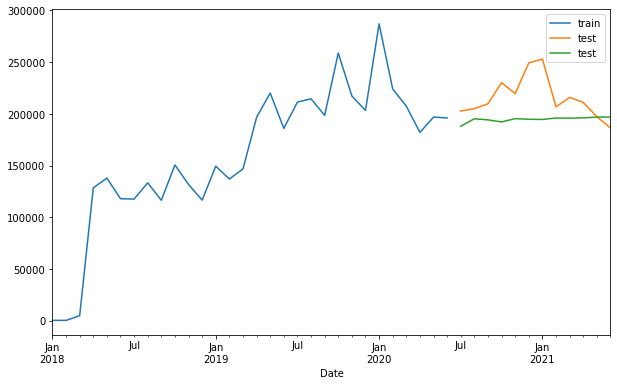

In [155]:
train.plot(legend='True', label='train',figsize=(10,6))
test.plot(legend='True', label='test')
predict.plot(legend='True', label='test')

# FORECASTING Future Data

In [46]:
Final_Model=ARIMA(ts,order=(4,0,1)).fit()
Final_Model

In [47]:
final_forecast=Final_Model.predict(len(ts),len(ts)+6)

<AxesSubplot:xlabel='Date'>

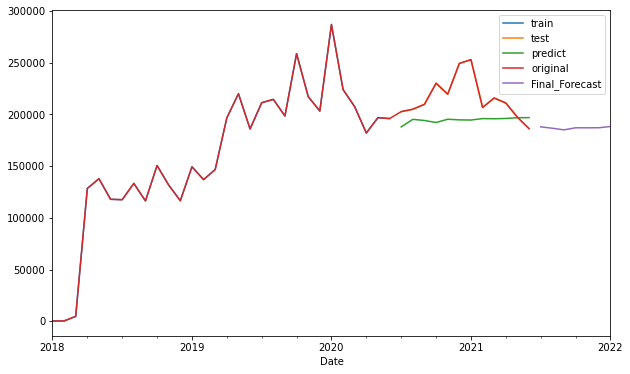

In [48]:
train.plot(legend='True', label='train',figsize=(10,6))
test.plot(legend='True', label='test')
predict.plot(legend='True', label='predict')
ts.plot(legend='True', label='original')
final_forecast.plot(legend='True', label='Final_Forecast')

In [49]:
final_forecast

2021-07-01    187975.742163
2021-08-01    186650.807701
2021-09-01    185059.774509
2021-10-01    187073.506269
2021-11-01    187047.491684
2021-12-01    187109.216051
2022-01-01    188304.212149
Freq: MS, dtype: float64

In [50]:
final_forecast.to_csv('Downloads/ordervolumeanalysisforecasteddata.csv',index=False)

In [51]:
import itertools

In [52]:
p=range(0,8)
q=range(0,8)
d=range(0,2)


In [53]:
pdq_combination=list(itertools.product(p,q,d))

In [54]:
len(pdq_combination)

128

In [55]:
rmse=[]
orders1=[]

In [56]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        predict=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,predict))
        orders1.append(pdq)
        rmse.append(error)
    except:
        continue
        
        

In [57]:
results=pd.DataFrame(index=orders1,data=rmse,columns=['RMSE'])

In [169]:
results.to_csv('Downloads/rmseerrorvalues.csv')

In [175]:
error=np.sqrt(mean_squared_error(test,predict))
error

208451.45828199122

In [176]:
test.mean(),np.sqrt(test.var())

(215544.58333333334, 19933.381706703745)

# Checking outliers of this below data

In [1]:
import seaborn as sns
import pandas as pd

In [8]:
data=pd.read_csv('C:/Users/120761/Documents/PyScripts/new/ova1.csv',parse_dates=['Date'],index_col=['Date'])

data

,Orders
Date,
2018-01-01,10
2018-01-02,11
2018-01-03,6
2018-01-04,3
2018-01-05,7
...,...
2021-06-23,5884
2021-06-24,12054
2021-06-25,8519


In [3]:
ts=data['Orders'].resample('MS').sum()

In [14]:
hist=data.Orders.mean()-3*data.Orders.std()

In [15]:
hist

-7620.666783627202

<AxesSubplot:>

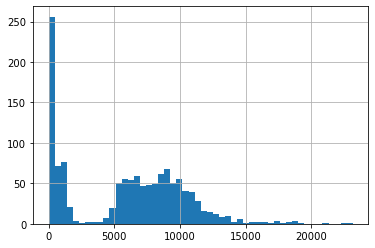

In [16]:
data['Orders'].hist(bins=50)